In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd
from math import sqrt

<IPython.core.display.Javascript object>


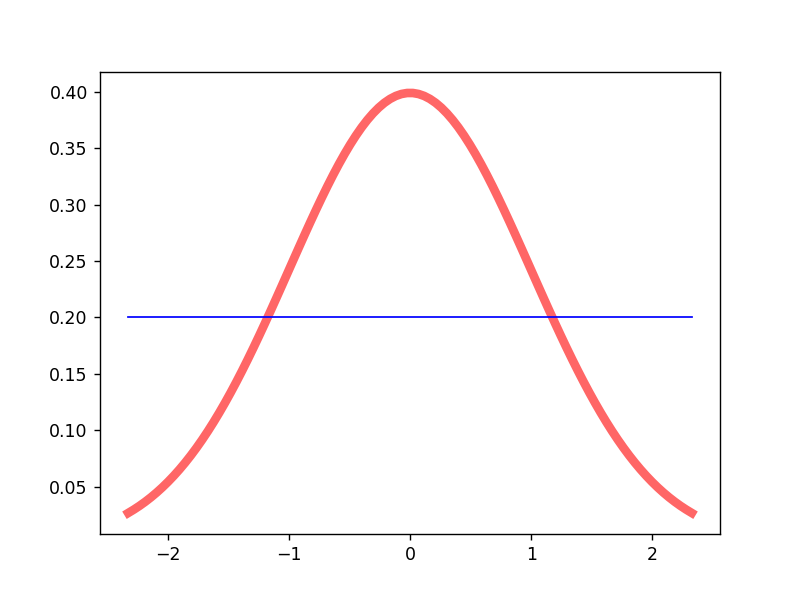

In [2]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

In [5]:
df=pd.read_csv('data/TCL_wt1.tsv', sep='\t')

In [6]:
data = df.dropna()

In [7]:
len(data)

1746

In [8]:
#data.astype({'Log2 Corrected Abundance Ratio': float, 'Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)': float, '-LOG10 Adj.P-val': float})

In [9]:
data

Accession                                        Description  \
0       P75936  Basal-body rod modification protein FlgD OS=Es...   
1       P76231  Uncharacterized protein YeaC OS=Escherichia co...   
2       P0A8S9  Flagellar transcriptional regulator FlhD OS=Es...   
4       P05706  PTS system glucitol/sorbitol-specific EIIA com...   
5       P29744  Flagellar hook-associated protein 3 OS=Escheri...   
6       P0A9A2  Bacterial non-heme ferritin-like protein OS=Es...   
7       P75937  Flagellar hook protein FlgE OS=Escherichia col...   
8       P43533  Flagella synthesis protein FlgN OS=Escherichia...   
9       P0ABR1  DNA damage-inducible protein I OS=Escherichia ...   
10      P26608  Flagellar secretion chaperone FliS OS=Escheric...   
12      P0ABH9  ATP-dependent Clp protease ATP-binding subunit...   
14      P52614  Flagellar hook-length control protein OS=Esche...   
15      P0ACY9  Uncharacterized protein YebG OS=Escherichia co...   
16      P0C054  Small heat shock protein IbpA OS=Escherichia c...   
17      P69741  Hydrogenase-2 small chain OS=Escherichia coli ...   
18      P06959  Dihydrolipoyllysine-residue acetyltransferase ...   
19      P0AER0  Glycerol uptake facilitator protein OS=Escheri...   
20      P52613  Flagellar FliJ protein OS=Escherichia coli (st...   
21      P0AGK8  HTH-type transcriptional regulator IscR OS=Esc...   
22      P24216  Flagellar hook-associated protein 2 OS=Escheri...   
23      P0AEM4  Negative regulator of flagellin synthesis OS=E...   
24      P09373  Formate acetyltransferase 1 OS=Escherichia col...   
25      P52643  D-lactate dehydrogenase OS=Escherichia coli (s...   
26      P04982  D-ribose pyranase OS=Escherichia coli (strain ...   
27      P0AFP6  GTP cyclohydrolase 1 type 2 homolog OS=Escheri...   
28      P0A9G6  Isocitrate lyase OS=Escherichia coli (strain K...   
29      P33602  NADH-quinone oxidoreductase subunit G OS=Esche...   
30      P0A759  Glucosamine-6-phosphate deaminase OS=Escherich...   
31      P41409  Pyrimidine-specific ribonucleoside hydrolase R...   
32      P37646  Cyclic di-GMP phosphodiesterase PdeH OS=Escher...   
...        ...                                                ...   
1964    P0ADB7  Entericidin B OS=Escherichia coli (strain K12)...   
1966    P0A915  Outer membrane protein W OS=Escherichia coli (...   
1967    P39180  Antigen 43 OS=Escherichia coli (strain K12) OX...   
1968    P0ACF8  DNA-binding protein H-NS OS=Escherichia coli (...   
1969    P0A7K2  50S ribosomal protein L7/L12 OS=Escherichia co...   
1970    P0A7G2  30S ribosome-binding factor OS=Escherichia col...   
1972    P0A937  Outer membrane protein assembly factor BamE OS...   
1973    P0A9L8  Pyrroline-5-carboxylate reductase OS=Escherich...   
1977    P62399  50S ribosomal protein L5 OS=Escherichia coli (...   
1978    P0AER8  Sodium/glutamate symporter OS=Escherichia coli...   
1979    P0A905  Outer membrane lipoprotein SlyB OS=Escherichia...   
1981    P76471  Outer membrane protein YfaZ OS=Escherichia col...   
1982    P76506  Probable phospholipid-binding lipoprotein MlaA...   
1984    P13036  Fe(3+) dicitrate transport protein FecA OS=Esc...   
1985    P0A927  Nucleoside-specific channel-forming protein Ts...   
1986    P0AB46  Uncharacterized protein YmgD OS=Escherichia co...   
1989    P10384  Long-chain fatty acid transport protein OS=Esc...   
1992    P06971  Ferrichrome outer membrane transporter/phage r...   
1996    P0A910  Outer membrane protein A OS=Escherichia coli (...   
1999    P0A908  MltA-interacting protein OS=Escherichia coli (...   
2001    P75780  Catecholate siderophore receptor Fiu OS=Escher...   
2003    P06996  Outer membrane protein C OS=Escherichia coli (...   
2004    P46474  Uncharacterized protein YhdP OS=Escherichia co...   
2009    P76344  Metal-binding protein ZinT OS=Escherichia coli...   
2010    P06129  Vitamin B12 transporter BtuB OS=Escherichia co...   
2011    P77330  Prophage lipoprotein Bor homolog OS=Escherichi...   
201

In [10]:
log2 = data["Log2 Corrected Abundance Ratio"]
log2 = log2.astype('float')
mu = log2.mean()
S_2 = len(log2)/(len(log2)-1)*np.var(log2)

In [20]:
print(mu, S_2)

-0.6386262156443276 0.2216143620633058


<IPython.core.display.Javascript object>


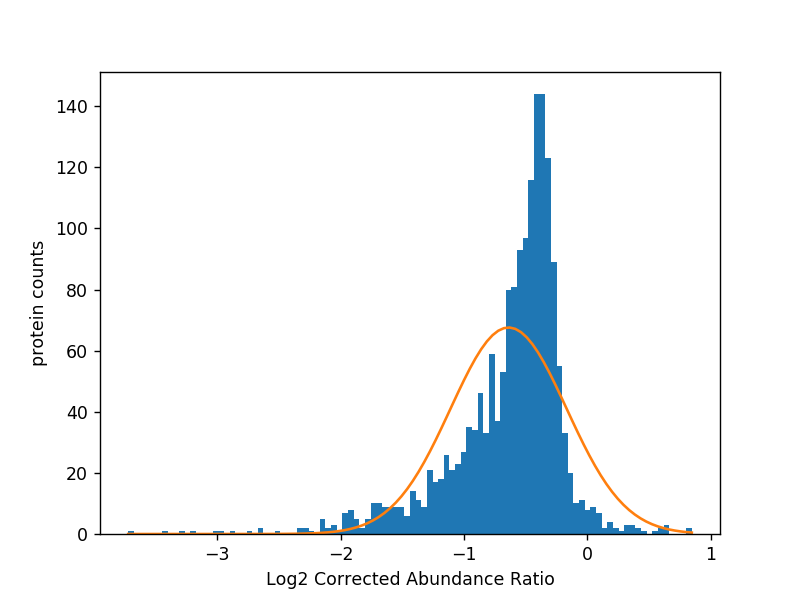

In [16]:
fig, ax = plt.subplots()
hist = ax.hist(log2, bins=100) # draw histogram
x = np.linspace(min(log2), max(log2), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(log2)*dx # scale accordingly
ax.plot(x, norm.pdf(x, mu, sqrt(S_2))*scale) # compute theoritical PDF and draw it

ax.set_xlabel("Log2 Corrected Abundance Ratio")
ax.set_ylabel('protein counts')
fig.show()

In [14]:
p_value = data["-LOG10 Adj.P-val"]
p_value = p_value.astype('float')

<IPython.core.display.Javascript object>


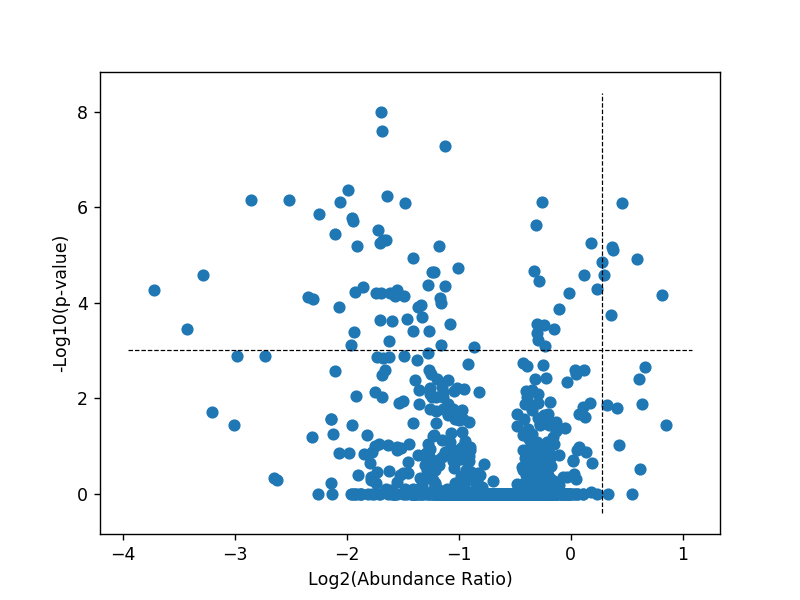

In [17]:
i_tresh = 0.28
j_tresh = 3
fig, ax = plt.subplots()
ax.scatter(log2, p_value, marker="o")

ax.plot(ax.get_xlim(), (j_tresh, j_tresh), color="black", linestyle="dashed", linewidth=0.7)
ax.plot((i_tresh, i_tresh), ax.get_ylim(), color="black", linestyle="dashed", linewidth=0.7)

ax.set_xlabel("Log2(Abundance Ratio)")
ax.set_ylabel('-Log10(p-value)')
fig.show()

In [ ]:
titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]

In [37]:
data2 = data[(-log2 >= 3) & (p_value > 0.28)]

In [38]:
data2

Accession                                        Description Gene Symbol  \
0    P75936  Basal-body rod modification protein FlgD OS=Es...        flgD   
1    P76231  Uncharacterized protein YeaC OS=Escherichia co...        yeaC   
2    P0A8S9  Flagellar transcriptional regulator FlhD OS=Es...        flhD   
4    P05706  PTS system glucitol/sorbitol-specific EIIA com...        srlB   
5    P29744  Flagellar hook-associated protein 3 OS=Escheri...        flgL   

  Corrected Abundance ratio (1.53) Log2 Corrected Abundance Ratio  \
0                      0.075816993                   -3.721334942   
1                      0.092810458                   -3.429568818   
2                      0.102614379                   -3.284695189   
4                      0.108496732                   -3.204276506   
5                      0.124183007                   -3.009460329   

   Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)  \
0                                           0.000055              
1                                           0.000351              
2                                           0.000027              
4                                           0.019963              
5                                           0.036746              

  -LOG10 Adj.P-val  
0      4.260067469  
1       3.45462743  
2      4.571899347  
4      1.699767669  
5      1.434786589